#### Ingestion of the cleaned dataset

In [147]:
import pandas as pd

# Define the path to the local file
file_path = 'data/Sample_Data_Product_Cleaned.csv'

# Load the data into a pandas DataFrame
df = pd.read_csv(file_path)

# Display the DataFrame
df.head()


,product_type,sku,estimated_price,availability,number_of_products_sold,revenue_generated,customer_demographics,stock_levels,lead_times,order_quantities,...,production_volumes,manufacturing_lead_time,manufacturing_costs,inspection_results,defect_rates,transportation_modes,routes,costs,demurrage,demurrage_bin
0,cosmetics,062000007,22790.0,17.0,715.0,8656.12,Non-binary,58.0,24.0,79.0,...,168.0,21.0,71.42,Pending,3.35,Rail,Route_B,407.65,0.0,False
1,cosmetics,1VBA0260GE,53970.0,78.0,949.0,4516.14,Unknown,75.0,15.0,90.0,...,617.0,28.0,80.63,Pass,4.66,Rail,Route_A,424.80,1633889.0,True
2,skincare,1VBF0810GE,80180.0,44.0,687.0,6449.54,Male,97.0,20.0,10.0,...,306.0,17.0,65.34,Pending,0.61,Air,Route_B,603.41,0.0,False
3,skincare,1VMG0080GE,62870.0,46.0,903.0,1755.28,Female,18.0,21.0,98.0,...,486.0,29.0,29.09,Fail,3.09,Rail,Route_C,331.07,0.0,False
4,skincare,1VMG0140GE,83820.0,99.0,163.0,7097.87,Non-binary,88.0,18.0,50.0,...,941.0,17.0,97.18,Pending,2.58,Road,Route_B,392.25,0.0,False


In [127]:
df.columns

Index(['product_type', 'sku', 'estimated_price', 'availability',
       'number_of_products_sold', 'revenue_generated', 'customer_demographics',
       'stock_levels', 'lead_times', 'order_quantities', 'shipping_times',
       'shipping_carriers', 'shipping_costs', 'supplier_name', 'location',
       'lead_time', 'production_volumes', 'manufacturing_lead_time',
       'manufacturing_costs', 'inspection_results', 'defect_rates',
       'transportation_modes', 'routes', 'costs', 'demurrage',
       'demurrage_bin'],
      dtype='object')

In [124]:
### WE DROP: 
# sku, 
# availability, 
# customer_demographics,
# revenue_generated, 

### WE KEEP: 
# estimated_price, 
# transportation_modes,
# inspection_results,
# routes,
# costs,
# defect_rates,
# manufacturing_lead_time, 
# production_volumes, 
# order_quantities, 
# lead_times, 
# stock_levels, 
# number_of_products_sold	 

In [150]:
from sklearn.preprocessing import StandardScaler

# Drop irrelevant columns if any (example)
df = df.drop(['sku', 'demurrage', 'customer_demographics', 'supplier_name' ], axis=1) #'product_type'

# Convert categorical variables to dummy variables
df = pd.get_dummies(df)

# Define features and target
X = df.drop('demurrage_bin', axis=1)
y = df['demurrage_bin']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [151]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Initialize models
models = {
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "Neural Network": Sequential([
        Dense(64, input_dim=X_train.shape[1], activation='relu'),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
}

# Train and evaluate each model
for name, model in models.items():
    if name == "Neural Network":
        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        model.fit(X_train, y_train, epochs=10, batch_size=10, verbose=0)
        _, accuracy = model.evaluate(X_test, y_test, verbose=0)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy}")


/Users/faustobravocuvi/envs/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Random Forest Accuracy: 0.5792682926829268
Logistic Regression Accuracy: 0.5711382113821138
SVM Accuracy: 0.5853658536585366
Neural Network Accuracy: 0.5386179089546204


In [152]:
# # Define parameter grid
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [None, 10, 20, 30],
# }

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [4, 6, 8, 10, 12]
}


# Initialize Grid Search
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Optimized Random Forest Accuracy: {accuracy}")


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] END ......................max_depth=4, n_estimators=100; total time=   0.1s
[CV] END ......................max_depth=4, n_estimators=100; total time=   0.2s
[CV] END ......................max_depth=4, n_estimators=100; total time=   0.2s
[CV] END ......................max_depth=4, n_estimators=100; total time=   0.2s
[CV] END ......................max_depth=4, n_estimators=100; total time=   0.2s
[CV] END ......................max_depth=4, n_estimators=200; total time=   0.3s
[CV] END ......................max_depth=4, n_estimators=200; total time=   0.3s
[CV] END ......................max_depth=4, n_estimators=200; total time=   0.3s
[CV] END ......................max_depth=4, n_estimators=200; total time=   0.3s
[CV] END ......................max_depth=4, n_estimators=200; total time=   0.3s
[CV] END ......................max_depth=4, n_estimators=300; total time=   0.3s
[CV] END ......................max_depth=4, n_e

In [155]:
# Train and evaluate each model
for name, model in models.items():
    if name == "Neural Network":
        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        model.fit(X_train, y_train, epochs=10, batch_size=10, verbose=0)
        _, accuracy = model.evaluate(X_test, y_test, verbose=0)
        y_pred = (model.predict(X_test) > 0.5).astype("int32")
        
        # Save the neural network model
        model.save(f'{name.lower().replace(" ", "_")}_model.h5')
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        
        # Save the model using pickle
        with open(f'{name.lower().replace(" ", "_")}_model.pkl', 'wb') as f:
            pickle.dump(model, f)
    
    print(f"{name} Accuracy: {accuracy}")

# Save the scaler using pickle
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

Random Forest Accuracy: 0.5691056910569106
Logistic Regression Accuracy: 0.5711382113821138
SVM Accuracy: 0.5853658536585366
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


Neural Network Accuracy: 0.5264227390289307


#### Visualization of each feature importance

Visualizing feature importance helps understand which features have the most impact on the prediction of the target variable in a RandomForest model.

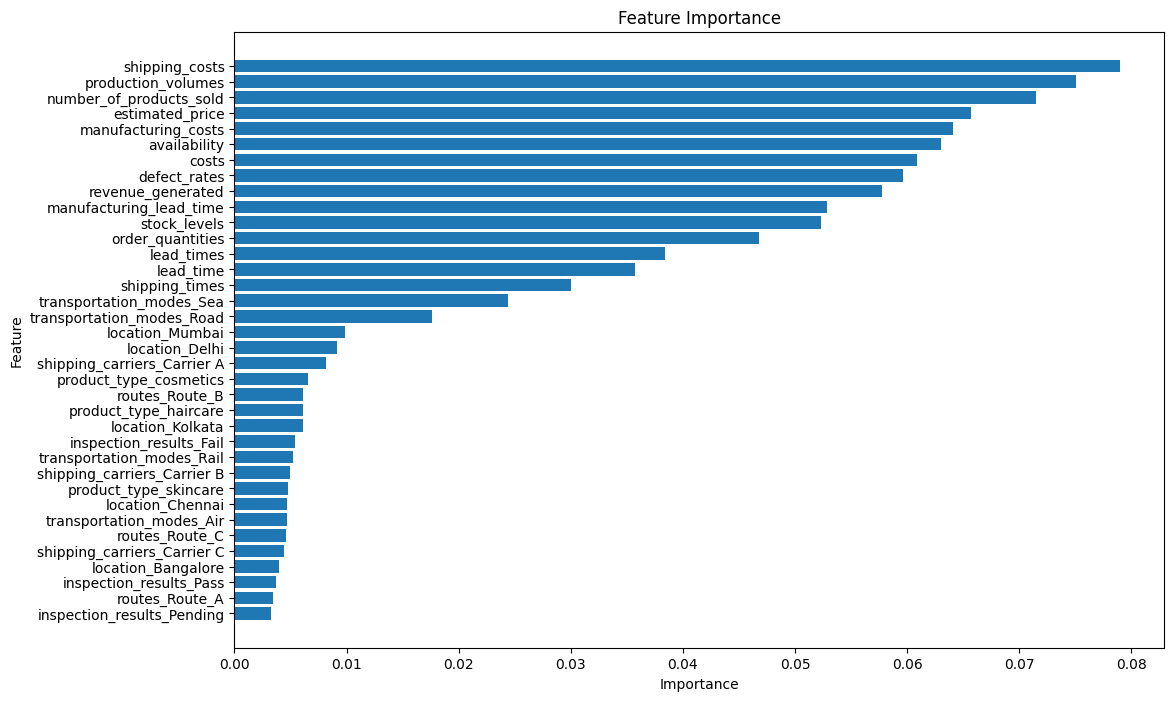

In [156]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Get feature importances
importances = best_model.feature_importances_

# Get feature names
feature_names = X.columns

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()
